## Logistic Regression: The Big Picture

Logistic regression is applied when the outcome variable is binary such as 1 or 0, denoting yes or no, positive or negative, success or failure, or healthy or unhealthy. Both the confidence intervals and hypothesis tests follow similar to what is found in linear regression. Whereas linear regression is based on least square estimation, logistic regression is based on maximum likelihood estimation.  It is used to calculate the probability of an event. Whereas linear regression has a normal distribution, logistic regression follows a binomial distribution.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

In [2]:
df1 = pd.read_csv('activity_binary.csv')
df1.head()

,activity,health_score
0,11,0
1,79,1
2,39,0
3,33,0
4,1,0


In [5]:
# Observations with health score 50 and greater, 1, denoted as "healthy"
# Observations with health score 49 and below, 0, denoted as "unhealthy"
df1['health_score'].value_counts()

0    26
1    24
Name: health_score, dtype: int64

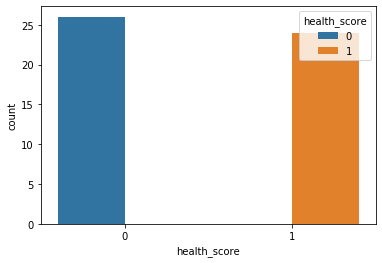

In [4]:
sns.countplot(x='health_score',hue='health_score',data=df1)

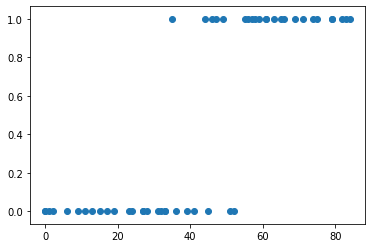

In [6]:
# Use scatterplot of data
plt.scatter(df1['activity'],df1['health_score'])

### Logistic Regression Equation

We need to transform the data, using the probability of 1.  We will use the logit function to transform the data, using natural log. This logit transformation of the log odds is caled the logit function.

Logit function:  ln(p/1-p)

Logistic equation (log_odds):
    
logit(y_pred) = b0 + b1x

The logistic regression model is additive but it is additive on the scale of log odds.  

### Logistic Regression Model

Hypothesis Testing

Null hypothesis H0:   no effect, b1=0
    
Alternative hypothesis H1: effect exist, b1 is not equal to 0

In [7]:
# Logistic Regression Model
model = sm.GLM.from_formula("health_score ~ activity", family=sm.families.Binomial(), data=df1)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           health_score   No. Observations:                   50
Model:                            GLM   Df Residuals:                       48
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10.016
Date:                Sun, 16 Feb 2020   Deviance:                       20.032
Time:                        15:17:04   Pearson chi2:                     21.4
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.1970      2.967     -3.100      0.002     -15.012      -3.382
activity       0.2044      0.064      3.183      0.001       0.079       0.330
==============================================================================
"""

The log odds of a healthy score increases by 0.2044 for each hour of activity.  

Here is the equation with the coefficients:

logit(y_pred) = -9.1970 + 0.2044*b1

### Interpretations and Inferences

In [8]:
# What is the predicted log odds of having a healthy score, 
# given 58 hours of activity in a week?
log_odds_predictedvalue = -9.1970 + 0.2044*58
log_odds_predictedvalue

2.658200000000001

In [9]:
import math

# Take exponential of ln to get the odds ratio, p/(1-p)
math.exp(log_odds_predictedvalue)

# For 58 hours of physical activity, the odds of a healthy score is 14.27 times.

14.27057892439859

Confidence Intervals

upper_ci = b1 + z_critical*se(b1)

lower_ci = b1 - z_critical*se(b1)

In [10]:
# Example as how to calculate confidence intervals
b1 = 0.2044
z_critical = 1.96
se_b1 = 0.064

upper_ci =  b1 + z_critical*se_b1
print(round(upper_ci,3))

lower_ci =  b1 - z_critical*se_b1
print(round(lower_ci,3))

0.33
0.079


Interpretations:  To interpret the slope, the log odds of a healthy score increases by 0.2044 for each hour of activity. To interpret the odds ratio, for each increase in activity, the odds of a a healthy score, denoted as 1, increases by 0.54 times that of an unhealthy score, on average.

Alternative Interpretation:   Hypothetically, let's say our p-value is 0.25 instead of 0.001, we would fail to reject the null hypothesis and cannot conclude that we have a significantly linear relationship between activity and the log odds of being healthy.

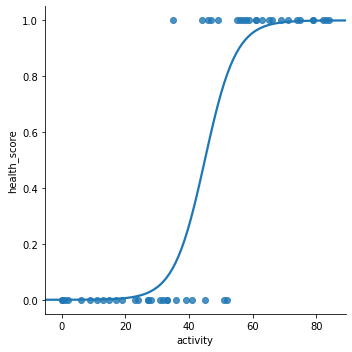

In [11]:
# Visualization
sns.lmplot(x='activity',y='health_score',logistic=True, data=df1)
plt.show()

A positive slope results in an S-shaped curve while a negative slope results in a  z-shaped curve.

The inference drawn is that the number of hours of physical activity can help us predict a person's health score. There is a positive yet small relationship.  We base this inference drawn from hypothesis testing and confidence intervals.

In [ ]:
# end